<a href="https://colab.research.google.com/github/Elizaluckianchikova/Algorithms-and-data-structure/blob/main/AVLtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AVL-дерево** - это структура данных, которая обеспечивает эффективное хранение и извлечение данных в отсортированном порядке. Оно было названо в честь его изобретателей, Адлера, Вегнера и Лассара. AVL-деревья используются в различных приложениях, таких как базы данных, системы управления контентом и системы обработки больших объемов данных.

**Коэффициент баланса узла в AVL-дереве** - это разница между высотой левого и правого поддерева этого узла.

**Фактор баланса** = (Высота левого поддерева - Высота правого поддерева) или (Высота правого поддерева - Высота левого поддерева)

Свойство самобалансировки дерева avl поддерживается коэффициентом баланса. Значение коэффициента баланса всегда должно быть -1, 0 или +1.
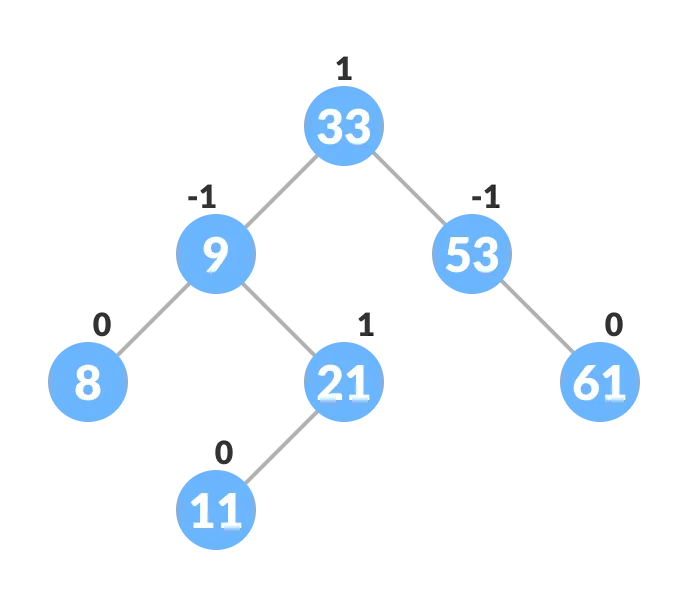


In [ ]:
#Класс AVLTree
class AVLTree:
# Конструктор дерева
def init(self):
self.root = None

# Функция вставки элемента в дерево
def insert(self, root, data):
    if root is None:
        root = AVLNode(data)
    else:
        self.insert(root.left, data)
        self.insert(root.right, data)
    return root

# Расчет высоты поддерева
def height(self, root):
    if root is None:
        return 0
    else:
        return max(self.height(root.left), self.height(root.right)) + 1

# Проверка на AVL свойство
def check_avl(self, node):
    height_l = self.height(node.left)
    height_r = self.height(node.right)
    diff = height_l - height_r
    if abs(diff) <= 1:
        return True
    else:
        return False

# Рекурсивное вычисление высоты поддерева
def height(self, node):
    if node is None:
        return 0
    else:
        return 1 + max(self.height(node.left), self.height(node.right))

In [ ]:
# класс узла дерева
class AVLNode:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        self.height = max(0, left.height() + 1, right.height() + 1) if left and right else 0

    # функция для получения высоты узла
    def height(self):
        return self.height

    # проверка на AVL-свойство
    def avl_check(self):
        # проверяем, отличается ли высота левого и правого поддеревьев больше чем на 1
        if abs(self.left.height - self.right.height) <= 1:
            # если да, то всё хорошо
            return True
        # иначе, делаем балансировку
        else:
            return False

    # балансировка дерева
    def balance_tree(self):
        # если высота правого поддерева больше высоты левого
        if self.left.

In [ ]:
# AVL tree implementation in Python


import sys

# Create a tree node
class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1


class AVLTree(object):

    # Function to insert a node
    def insert_node(self, root, key):

        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Function to delete a node
    def delete_node(self, root, key):

        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root

        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        balanceFactor = self.getBalance(root)

        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root

    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)

    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)


myTree = AVLTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
myTree.printHelper(root, "", True)
key = 13
root = myTree.delete_node(root, key)
print("After Deletion: ")
myTree.printHelper(root, "", True)